In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [5]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/MASTER_system_and_weather.csv")

In [7]:
df.dtypes

Date                 object
Generated (kWh)     float64
Efficiency          float64
System Name          object
Location             object
System Size (kW)    float64
Solar_Irradiance    float64
Temperature_2m      float64
Cloud_Cover           int64
dtype: object

In [9]:
X = df[['System Size (kW)', 'Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover']]
y = df['Generated (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.92422361 0.93459019 0.89721599 0.85596133 0.85776986]


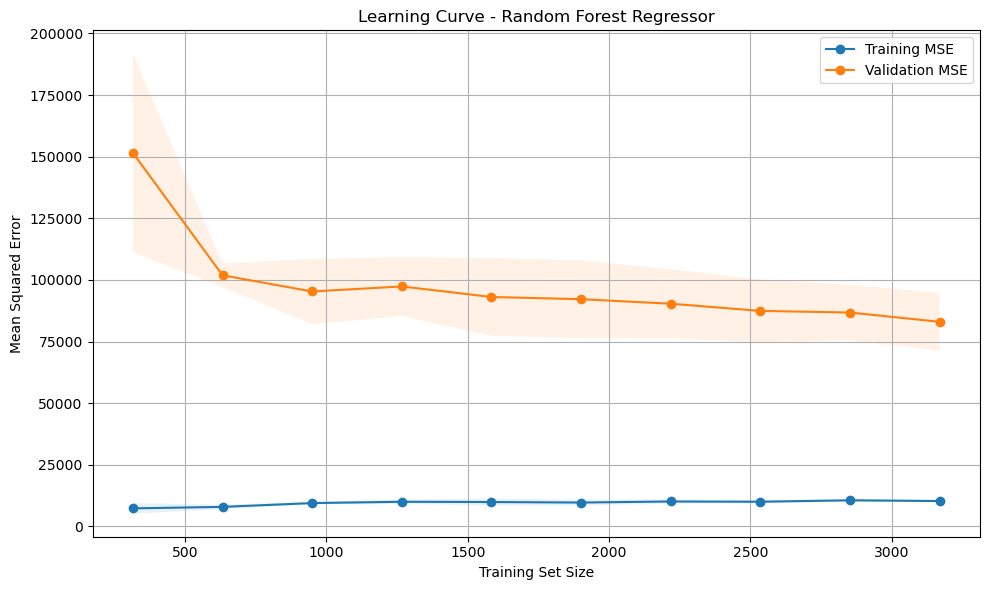

In [13]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',  
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation MSE')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1)
plt.title("Learning Curve - Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

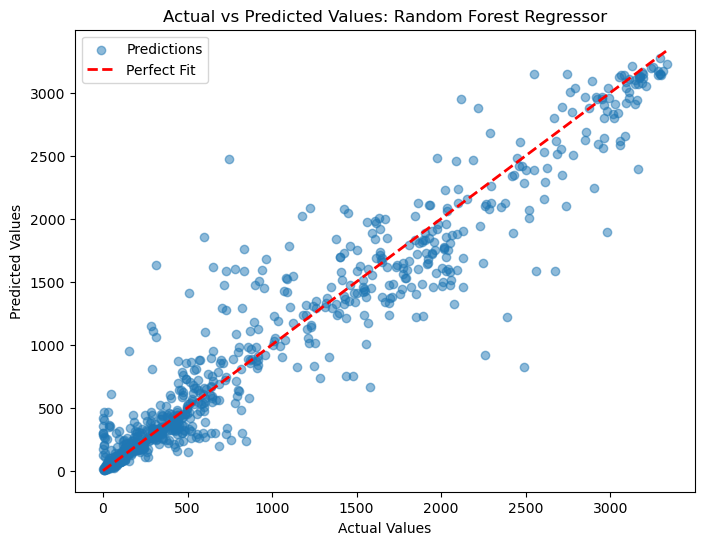

In [15]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regressor")
plt.legend()
plt.show()

In [84]:
y_train_pred = rf_model.predict(X_train)

train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_pred_rf)
test_mae = mean_absolute_error(y_test, y_pred_rf)
test_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
print(f"Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

Train R²: 0.9881 | Test R²: 0.9187
Train MAE: 58.1053 | Test MAE: 164.4299
Train MSE: 10220.6667 | Test MSE: 75327.7383


In [86]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']